# Training Python 

## Syllabus:

Week 1:

 - What is Python?
 - What are the basic operations in Python?
 - Programming in Python (if, elif, else, for, while)

Week 2:

 - Introduction to Numpy, Matplotlib, and Pandas

Week 3:

 - The use of Scipy for interpolation and advanced mathematics
 - A little preface to Python for Geoscience with Folium to create maps.

## Introduction to Scipy
In Python, the Scipy library functions do more complex mathematical calculations. These calculations often cannot be done in simpler Numpy. With Scipy, complex mathematical calculations no longer need to be written in scripts with multiple lines, just use the internal functions of the library. There are several sublibrary commonly used in Scipy:
- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fft)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse eigenvalue problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- IO file (scipy.io)

### Integral

In [2]:
from scipy import integrate

In [3]:
# if confused, type help (sublibrary). You'll see the function details.

In [8]:
y = integrate.quad(lambda x: x**2, 0, 2)
print(y)

(2.666666666666667, 2.960594732333751e-14)


The calculation above is an integral of x ^ 2 with a limit of 0 to 2. The output is the estimated value of the integral results and also the error limit estimated by the program.

### Interpolasi

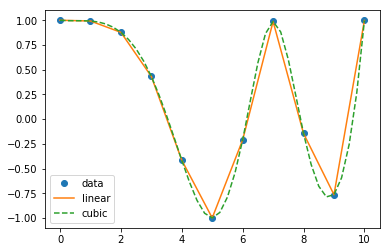

In [7]:
# import library that we need
import numpy as np
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt
# define x and y
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/8.0)
# comparing 1d linear and 1d cubic interpolation
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
# initiate x values with more data points
xnew = np.linspace(0, 10, num=41, endpoint=True)
# plot
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

Task: How to find out which interpolation is the most accurate?

## Making simple maps with Folium

In [9]:
import folium

In [10]:
peta = folium.Map(location=[-7.32732, 112.73188]) # masukkan koordinat Kota Surabaya

To display the map, just call the variable used to initiate the map.

In [11]:
peta

To save:

In [12]:
peta.save('peta_surabaya.html')

The default display for color and tile is OpenStreetMap, but can also be replaced with Stamen Terrain, Stamen Toner, Bright Mapbox, Mapbox Control Room, etc.


In [13]:
peta_its = folium.Map(location=[-7.28277, 112.79416], 
                      zoom_start=15) # campus coordinate

In [14]:
peta_its

Making markers in map

In [15]:
tooltip = 'Click me!'

folium.Marker([-7.280312, 112.794869], popup='<i>DTG ITS</i>', 
              tooltip=tooltip).add_to(peta_its)
folium.Marker([-7.281694, 112.795496], popup='<i>Perpus ITS</i>', 
              tooltip=tooltip).add_to(peta_its)

peta_its

In [16]:
peta_its.add_child(folium.LatLngPopup())

Making the map more interactive by adding waypoints.

In [17]:
peta_its.add_child(folium.ClickForMarker(popup='Waypoint'))

In [ ]:
from folium import plugins
measure = plugins.MeasureControl()
peta_its.add_child(measure)

In [ ]:
minimap = plugins.MiniMap()
peta_its.add_child(minimap)

Changing icons with Font Awesome.

In [ ]:
folium.Marker([-7.280312, 112.794869], popup='<i>DTG ITS</i>', tooltip=tooltip, 
              icon=folium.Icon(color='black', icon='globe', prefix='fa')).add_to(peta_its)
folium.Marker([-7.281694, 112.795496], popup='<i>Perpus ITS</i>', tooltip=tooltip,
              icon=folium.Icon(color='black', icon='book', prefix='fa')).add_to(peta_its)

peta_its